In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import mnist
train_X = mnist.train_images()
train_y = mnist.train_labels()

In [28]:
def plot(X,y,pred=None):
    plt.imshow(X)
    plt.title(f"Label: {y} , Pred: {pred}")
    plt.gcf().set_size_inches(2,2)
    plt.show()

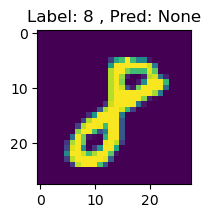

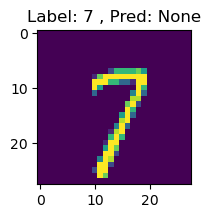

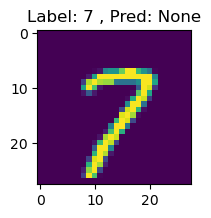

In [29]:
i_vals = np.random.randint(0,1000,size=3)
for i in i_vals:
    plot(train_X[i],train_y[i])

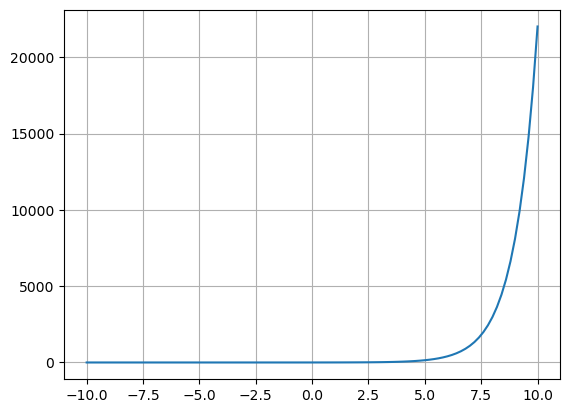

In [7]:
import torch
xi = torch.linspace(-10,10,101)
yi = torch.exp(xi)
plt.plot(xi,yi)
plt.grid()
plt.show()

In [16]:
def plot_probs(theta):
    plt.bar(range(len(theta)),theta)
    plt.ylabel(r'$\theta$')
    plt.xlabel(r'category')
    plt.show()

x = torch.randn(123,10)
theta_i = torch.exp(x)/torch.sum(torch.exp(x),dim=-1).reshape(-1,1)
print(torch.sum(theta_i,dim=-1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

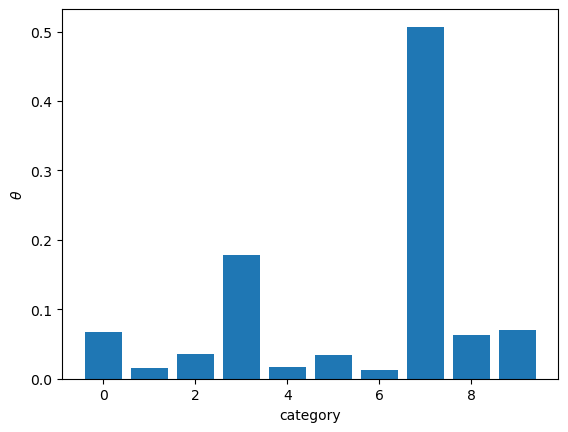

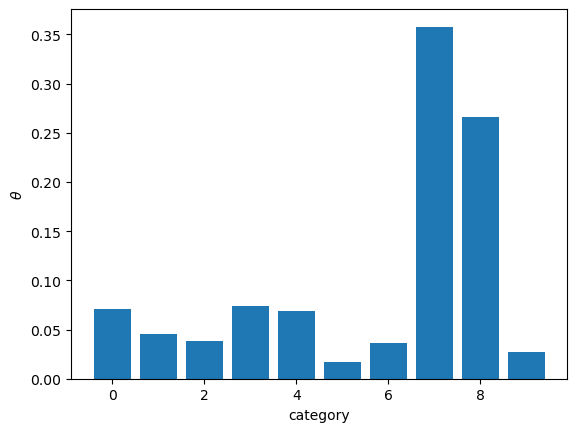

In [17]:
plot_probs(theta_i[0])
plot_probs(theta_i[-1])

In [19]:
x = torch.randn(3,10)
y = torch.randint(0,10,(3,))

one_hots = torch.nn.functional.one_hot(y, 10)
thetas = torch.exp(x)/torch.sum(torch.exp(x),dim=-1).reshape(-1,1)
losses = -torch.log(torch.sum(thetas*one_hots,dim=-1))
loss = losses.mean()
print(loss)

print(torch.nn.functional.cross_entropy(x,y))

tensor(2.9922)
tensor(2.9922)


In [20]:
def create_model(N):
    return torch.nn.Sequential(
    torch.nn.Linear(784,N),
    torch.nn.ReLU(),
    torch.nn.Linear(N,10)
    )

model = create_model(200)
logits = model(torch.randn(123,784))
labels = torch.randint(0,10,(123,))
print(torch.nn.functional.cross_entropy(logits,labels))

tensor(2.3430, grad_fn=<NllLossBackward0>)


In [21]:
def get_random_batch(N = 200, collection = 'train'):
    alldata = mnist.train_images()
    mean,std = alldata.mean(),alldata.std()
    
    images = getattr(mnist,collection+'_images')()
    labesl = getattr(mnist,collection+'_labels')()
    indices = np.random.choice(np.arange(len(images)), size = (N,))
    X = getattr(mnist,collection+'_images')()[indices].reshape(-1,784)
    y = getattr(mnist,collection+'_labels')()[indices]
    return torch.FloatTensor((X-mean)/std),torch.LongTensor(y)

In [26]:
def train(Nhidden = 200, Nsteps = 300):
    MLP = create_model(Nhidden)
    adam = torch.optim.Adam(MLP.parameters(),1e-3)
    for i in range(Nsteps):
        x,y = get_random_batch()
        logits = MLP(x)
        loss = torch.nn.functional.cross_entropy(logits,y)
        loss.backward()
        adam.step()
        adam.zero_grad()
        if i%50==0:
            print(f"Loss {i}: {loss}")
    return MLP

trained = train()

Loss 0: 2.3097989559173584
Loss 50: 0.36479464173316956
Loss 100: 0.21584536135196686
Loss 150: 0.2694706916809082
Loss 200: 0.17888383567333221
Loss 250: 0.12540152668952942


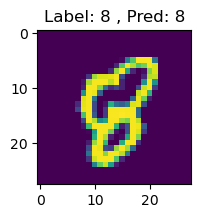

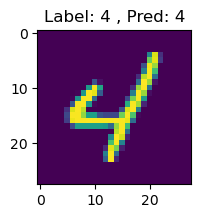

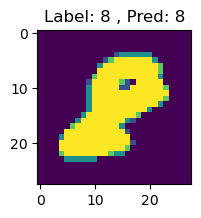

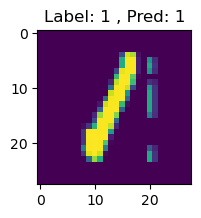

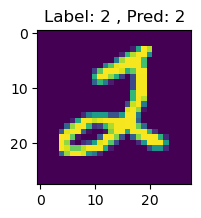

In [49]:
num = 5
sampleX,sampleY = get_random_batch(num,"test")
for i in range(num):
    preds = trained(sampleX).argmax(dim=-1)
    plot(sampleX[i].reshape(28,28),sampleY[i],preds[i])

In [50]:
maks = len(sampleX)
correct = 0
for i in range(maks):
    if sampleY[i] == preds[i]:
        correct += 1
        
print(f"{correct}/{maks}")

5/5
